<a href="https://colab.research.google.com/github/Ashis-Palai/Porto-Seguro-Safe-s-Driver-Prediction/blob/main/Porto_Seguros_Safe_Driver_prediction_EDA_1_submitted_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Basic Inspection of the Data**

In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/test.csv')
print('Shape of train data set is :',train_data.shape)
print('Shape of test data set is :',test_data.shape)

Shape of train data set is : (595212, 59)
Shape of test data set is : (892816, 58)


In [7]:
pd.DataFrame(train_data)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0                   0              0              1              0  ...   
1                   0              0              0              1  ...   
2                   0              0              0              1  ...   
3                   0              1              0              0  ...   
4                   0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595207              0              0              0              0  ...   
595208              0              0              0              0  ...   
595209              0              1              0              0  ...   
595210              0              0              0              1  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0                9           1           5           8               0   
1                3           1           1           9               0   
2                4           2           7           7               0   
3                2           2           4           9               0   
4                3           1           1           3               0   
...            ...         ...         ...         ...             ...   
595207           4           1           9           6               0   
595208           4           1           3           8               1   
595209           3           2           2           6               0   
595210           4           1           4           2               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0                    1               1               0               0   
1                    1               1               0               1   
2                    1               1               0               1   
3                    0               0               0               0   
4                    0               0               1               1   
...                ...             ...             ...             ...   
595207               1               1               0               1   
595208               0               1               0               1   
595209               0               1               0               0   
595210               1               1               1               0   
595211               1               0               0               0   

        ps_calc_20_bin  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
595207               1  
595208               1  
595209               0  
595210               0  
595211               0  

[595212 rows x 59 columns]

In [ ]:
train_data

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


**1.1 Observations on the columns:**



*   out of all columns **four types of groups of columns** are there i.e '**ind**','**reg**','**car**','**calc**'
*   Post fix **bin** is used for **binary features**

*   Post fix **cat** is used for **categorical features**
*   **ID** reprents to customer


*   **target** represents to output value


*   Features with **missing value** are represented as -1














## **2.Constructing Meta Data:**

In [ ]:
dict_={'ind':'Individual','reg':'registration','car':'Motor_Car','calc':'Calculated'}
meta_data=pd.DataFrame(columns=['column_name','type','use_of_column','data_type','category'])
meta_data['column_name']=train_data.columns
for i in meta_data.iterrows():
  if (i[1]['column_name'])=='id':
    (i[1]['use_of_column'])='user_id'
    (i[1]['data_type'])=((str(type(train_data['id'].values[0])).split('.')[-1]).split('>')[-2]).split("'")[-2]
    (i[1]['type'])='Categorical'
    (i[1]['category'])=None
  elif (i[1]['column_name'])=='target':
    (i[1]['use_of_column'])='output_target'
    (i[1]['data_type'])=((str(type(train_data['target'].values[0])).split('.')[-1]).split('>')[-2]).split("'")[-2]
    (i[1]['type'])='Binary'
    (i[1]['category'])=None
  else:
    for j in dict_:
      if j in (i[1]['column_name']):
        (i[1]['category'])=dict_[j]
        (i[1]['data_type'])=((str(type(train_data[i[1]['column_name']].values[0])).split('.')[-1]).split('>')[-2]).split("'")[-2]
        (i[1]['use_of_column'])='Input_Feature'
        if 'bin' in (i[1]['column_name']):
          (i[1]['type'])='Binary'
        elif 'cat' in (i[1]['column_name']):
          (i[1]['type'])='Categorical'
        else:
          (i[1]['type'])='Continuous'


In [ ]:
meta_data.head(30)

column_name         type  use_of_column data_type      category
0              id  Categorical        user_id     int64          None
1          target       Binary  output_target     int64          None
2       ps_ind_01   Continuous  Input_Feature     int64    Individual
3   ps_ind_02_cat  Categorical  Input_Feature     int64    Individual
4       ps_ind_03   Continuous  Input_Feature     int64    Individual
5   ps_ind_04_cat  Categorical  Input_Feature     int64    Individual
6   ps_ind_05_cat  Categorical  Input_Feature     int64    Individual
7   ps_ind_06_bin       Binary  Input_Feature     int64    Individual
8   ps_ind_07_bin       Binary  Input_Feature     int64    Individual
9   ps_ind_08_bin       Binary  Input_Feature     int64    Individual
10  ps_ind_09_bin       Binary  Input_Feature     int64    Individual
11  ps_ind_10_bin       Binary  Input_Feature     int64    Individual
12  ps_ind_11_bin       Binary  Input_Feature     int64    Individual
13  ps_ind_12_bin       Binary  Input_Feature     int64    Individual
14  ps_ind_13_bin       Binary  Input_Feature     int64    Individual
15      ps_ind_14   Continuous  Input_Feature     int64    Individual
16      ps_ind_15   Continuous  Input_Feature     int64    Individual
17  ps_ind_16_bin       Binary  Input_Feature     int64    Individual
18  ps_ind_17_bin       Binary  Input_Feature     int64    Individual
19  ps_ind_18_bin       Binary  Input_Feature     int64    Individual
20      ps_reg_01   Continuous  Input_Feature   float64  registration
21      ps_reg_02   Continuous  Input_Feature   float64  registration
22      ps_reg_03   Continuous  Input_Feature   float64  registration
23  ps_car_01_cat  Categorical  Input_Feature     int64     Motor_Car
24  ps_car_02_cat  Categorical  Input_Feature     int64     Motor_Car
25  ps_car_03_cat  Categorical  Input_Feature     int64     Motor_Car
26  ps_car_04_cat  Categorical  Input_Feature     int64     Motor_Car
27  ps_car_05_cat  Categorical  Input_Feature     int64     Motor_Car
28  ps_car_06_cat  Categorical  Input_Feature     int64     Motor_Car
29  ps_car_07_cat  Categorical  Input_Feature     int64     Motor_Car

In [ ]:
meta_data[meta_data['data_type']=='float64'].shape

(10, 5)

In [ ]:
# below details showing the individual counts of diffrent category of features

pd.DataFrame({'count': meta_data.groupby(['category'])['category'].count()})

count
category           
Calculated       20
Individual       18
Motor_Car        16
registration      3

In [ ]:
# below details showing use of the respective columns on basis of individual types

pd.DataFrame({'count': meta_data.groupby(['type','use_of_column'])['use_of_column'].count()})

count
type        use_of_column       
Binary      Input_Feature     17
            output_target      1
Categorical Input_Feature     14
            user_id            1
Continuous  Input_Feature     26

## **3. out put class verificatiion:**

In [1]:
plt.figure()
fig,ax=plt.subplots(figsize=(8,8))
x=list(train_data['target'].value_counts().index.values)
y=train_data['target'].value_counts().values

sns.barplot(ax=ax,x=x,y=y,hue=y)
plt.xlabel('total class')
plt.ylabel('Number of Values')
plt.show()

NameError: ignored



*   The Data is  not balanced as we can see from above 
*   Output 1 (**claimed**)=21,694
*   Output 0 (**Notclaimed**)=5,73,518

*   We can either undersample the data by reducing 0 or upsample the data by increasing 1






## **4. Continous valued features(Features with & without Decimal Values ):**

In [ ]:
cont=list(meta_data[(meta_data['type']=='Continuous')]['column_name'])
train_data[cont].describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       2.346072   
std         0.287643       0.404264       0.793506       0.832548   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       2.000000   
50%         0.700000       0.300000       0.720677       3.000000   
75%         0.900000       0.600000       1.000000       3.000000   
max         0.900000       1.800000       4.037945       3.000000   

           ps_car_12      ps_car_13  ...     ps_calc_05     ps_calc_06  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.379945       0.813265  ...       1.885886       7.689445   
std         0.058327       0.224588  ...       1.134927       1.334312   
min        -1.000000       0.250619  ...       0.000000       0.000000   
25%         0.316228       0.670867  ...       1.000000       7.000000   
50%         0.374166       0.765811  ...       2.000000       8.000000   
75%         0.400000       0.906190  ...       3.000000       9.000000   
max         1.264911       3.720626  ...       6.000000      10.000000   

          ps_calc_07     ps_calc_08     ps_calc_09     ps_calc_10  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        3.005823       9.225904       2.339034       8.433590   
std         1.414564       1.459672       1.246949       2.904597   
min         0.000000       2.000000       0.000000       0.000000   
25%         2.000000       8.000000       1.000000       6.000000   
50%         3.000000       9.000000       2.000000       8.000000   
75%         4.000000      10.000000       3.000000      10.000000   
max         9.000000      12.000000       7.000000      25.000000   

          ps_calc_11     ps_calc_12     ps_calc_13     ps_calc_14  
count  595212.000000  595212.000000  595212.000000  595212.000000  
mean        5.441382       1.441918       2.872288       7.539026  
std         2.332871       1.202963       1.694887       2.746652  
min         0.000000       0.000000       0.000000       0.000000  
25%         4.000000       1.000000       2.000000       6.000000  
50%         5.000000       1.000000       3.000000       7.000000  
75%         7.000000       2.000000       4.000000       9.000000  
max        19.000000      10.000000      13.000000      23.000000  

[8 rows x 26 columns]

### **4.1 Features with float values**




In [ ]:
#Features with decimal values
float_features=meta_data[meta_data['data_type']=='float64']['column_name']
float_features=list(float_features)
float_features_with_target=meta_data[meta_data['data_type']=='float64']['column_name']
float_features_with_target=list(float_features_with_target)
float_features_with_target.append('target')

### **4.2 Features with missing values (-1)**

In [ ]:
train_data[cont].describe().columns[(train_data[cont].describe()==-1).any(axis=0)]

Index(['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14'], dtype='object')

### **4.3 Continuous Features with integer values**





In [ ]:
#Features with integer values
integer_features=meta_data[(meta_data['data_type']=='int64') & (meta_data['type']=='Continuous') ]['column_name']
integer_features=list(integer_features)
integer_features_with_target=meta_data[(meta_data['data_type']=='int64') & (meta_data['type']=='Continuous') ]['column_name']
integer_features_with_target=list(integer_features_with_target)
integer_features_with_target.append('target')


### **4.4 Density Distribution plots(Continous valued features)**

<Figure size 432x288 with 0 Axes>

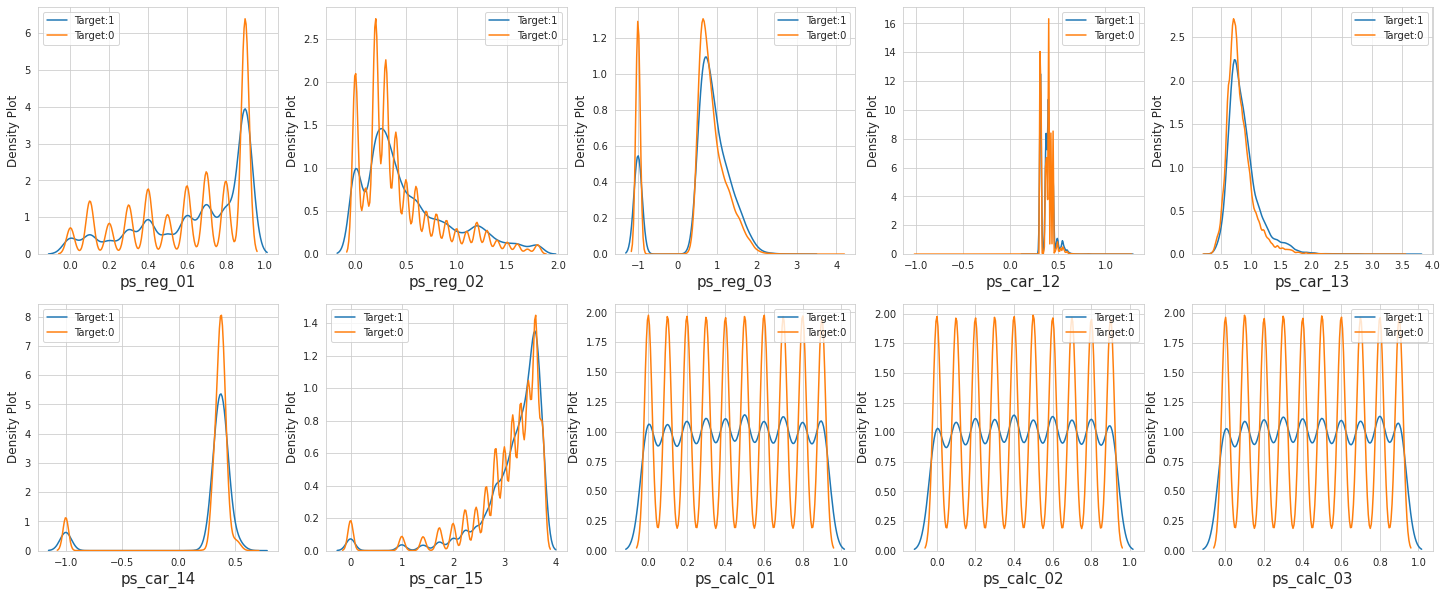

In [ ]:
t1=train_data.loc[train_data['target']==1]
t0=train_data.loc[train_data['target']!=1]
i=0
plt.figure()
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,5,figsize=(25,10))

for feature in float_features:
  i+=1
  plt.subplot(2,5,i)
  sns.kdeplot(t1[feature],label='Target:1')
  sns.kdeplot(t0[feature],label='Target:0')
  plt.ylabel('Density Plot',fontsize=12)
  plt.xlabel(str(feature),fontsize=15)
  plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

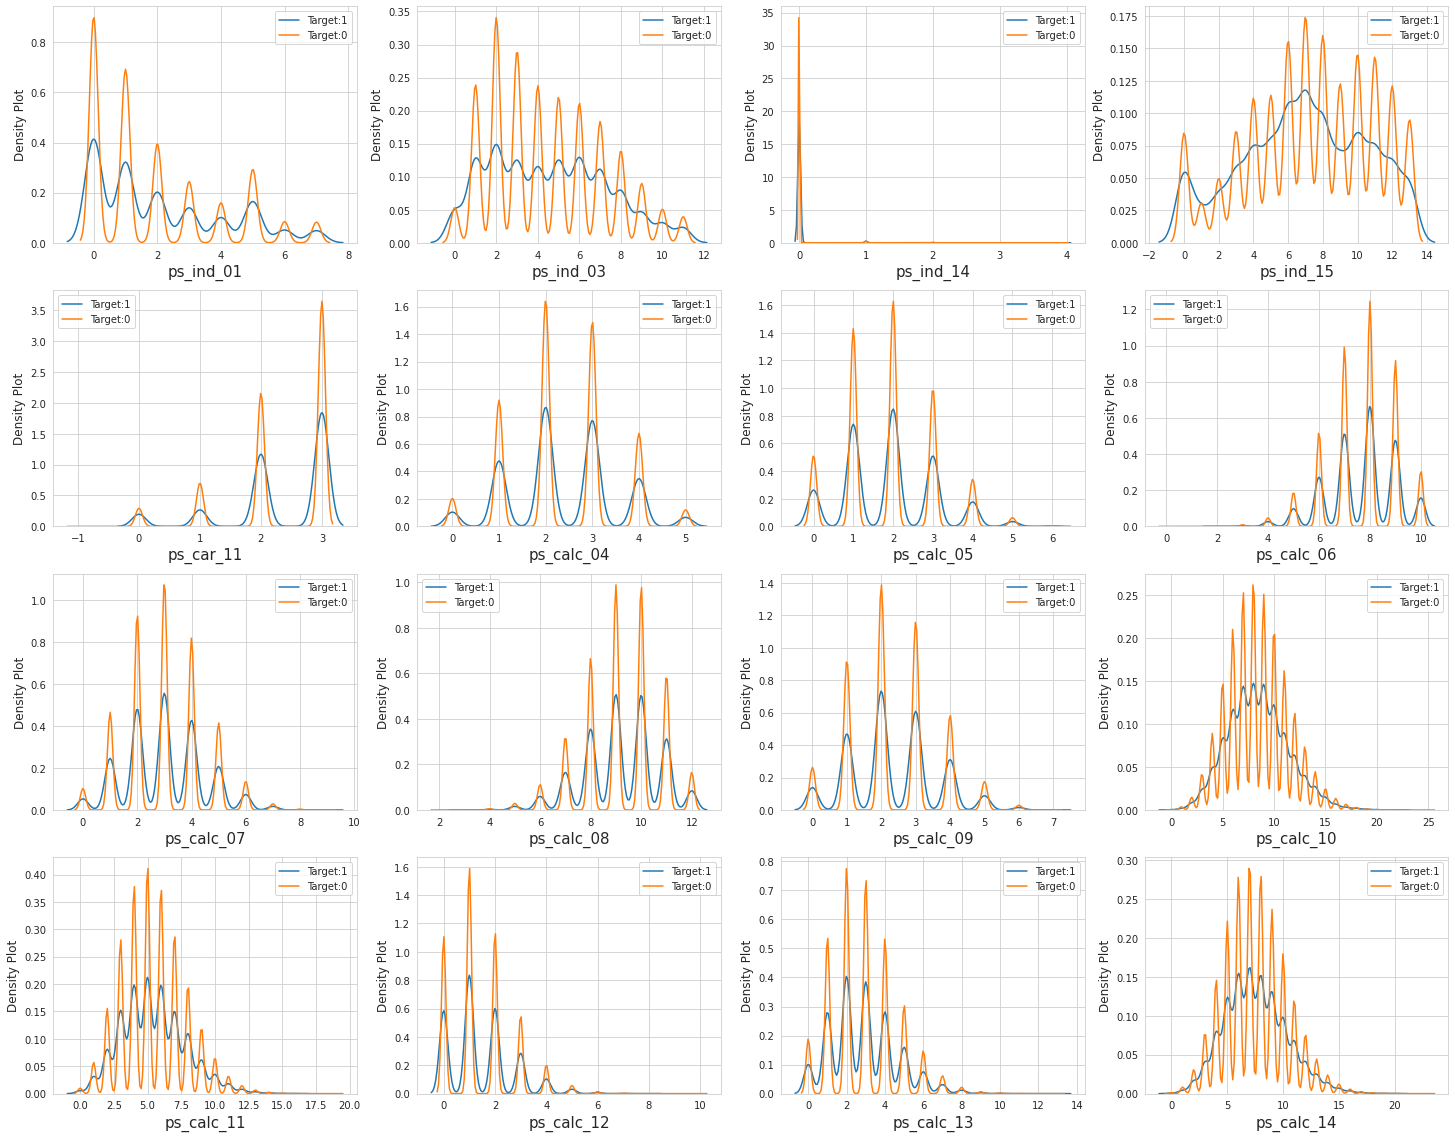

In [ ]:
t1=train_data.loc[train_data['target']==1]
t0=train_data.loc[train_data['target']!=1]
i=0
plt.figure()
sns.set_style('whitegrid')
fig, ax = plt.subplots(4,4,figsize=(25,20))

for feature in integer_features:
  i+=1
  plt.subplot(4,4,i)
  sns.kdeplot(t1[feature],label='Target:1')
  sns.kdeplot(t0[feature],label='Target:0')
  plt.ylabel('Density Plot',fontsize=12)
  plt.xlabel(str(feature),fontsize=15)
  plt.legend()
plt.show()

**4.4.1 OBSERVATION:Density Distribution plots for Continous valaued features :**



*   Almost all continous valued features overlapped with each other for target value 0 and 1 with same pattern but with diffrent variations which means each feature is occuring similarly for target 0 and 1 but with diffrent counts(densities), which also indicates  data imbalance for target out put 0 and 1.
*   **ps_car_12** has more variation in target value 0 than target value 1 



### **4.5 Continous valaued(float) features Corelation Matrix**

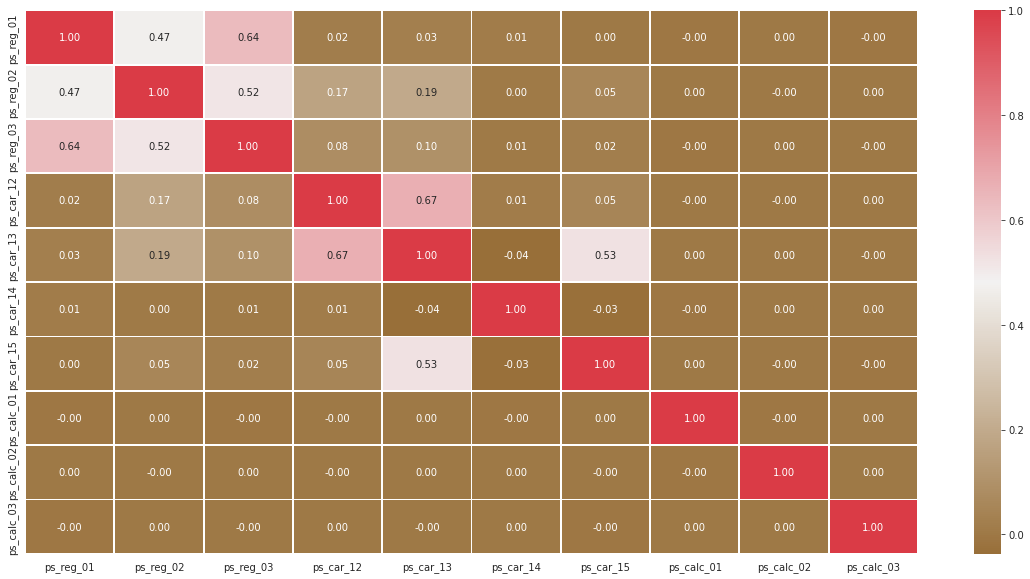

In [ ]:
plt.figure(figsize=(20,10))
corr=train_data[float_features].corr()
cmap = sns.diverging_palette(50, 10, as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap,fmt='.2f',linewidths=.8)
plt.show()

**4.5.1 OBSERVATION: Continous valaued(float) features Corelation Matrix**



*  **ps_reg_01** with **ps_reg_02** (**0.47**)
*  **ps_reg_01** with **ps_reg_03** (**0.64**)
*  **ps_reg_02** with **ps_reg_03** (**0.52**)
*   **ps_car_12** with **ps_car_13** (**0.67**)
*   **ps_car_13** with **ps_car_15** (**0.53**)







### **4.6 Continous valaued (Ineteger) features Corelation Matrix**

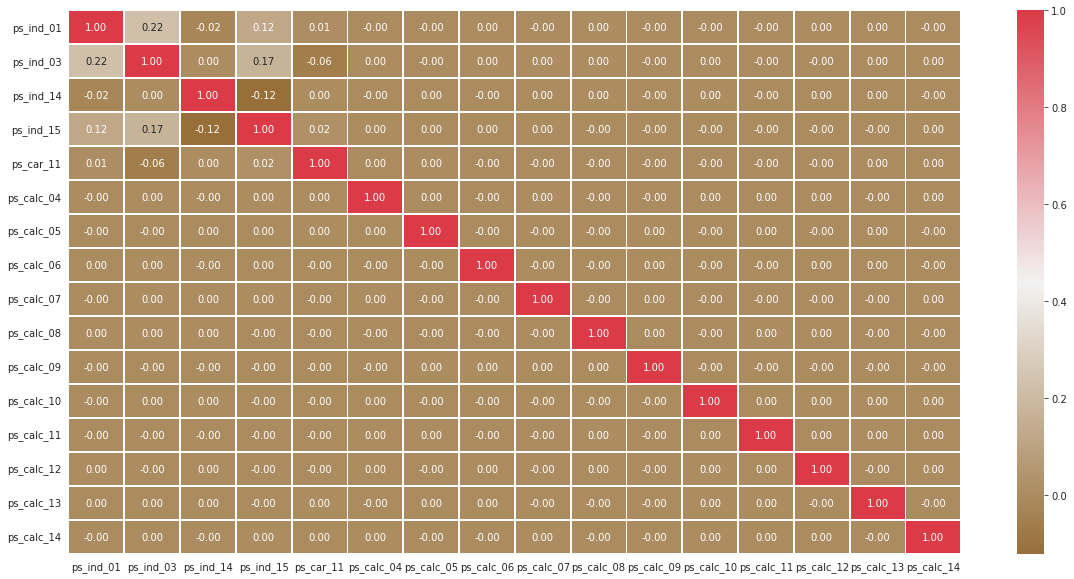

In [ ]:
plt.figure(figsize=(20,10))
corr=train_data[integer_features].corr()
cmap = sns.diverging_palette(50, 10, as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap,fmt='.2f',linewidths=.8)
plt.show()

**4.6.1 OBSERVATION: Continous valaued(integer) features Corelation Matrix:**

*  **ps_ind_01** with **ps_ind_03** (**0.22**)
*  **ps_ind_15** with **ps_ind_03** (**0.17**)
*  **ps_ind_15** with **ps_ind_01** (**0.12**)


## **4.7 Pair plot of all the corelated features found above**


<Figure size 432x288 with 0 Axes>

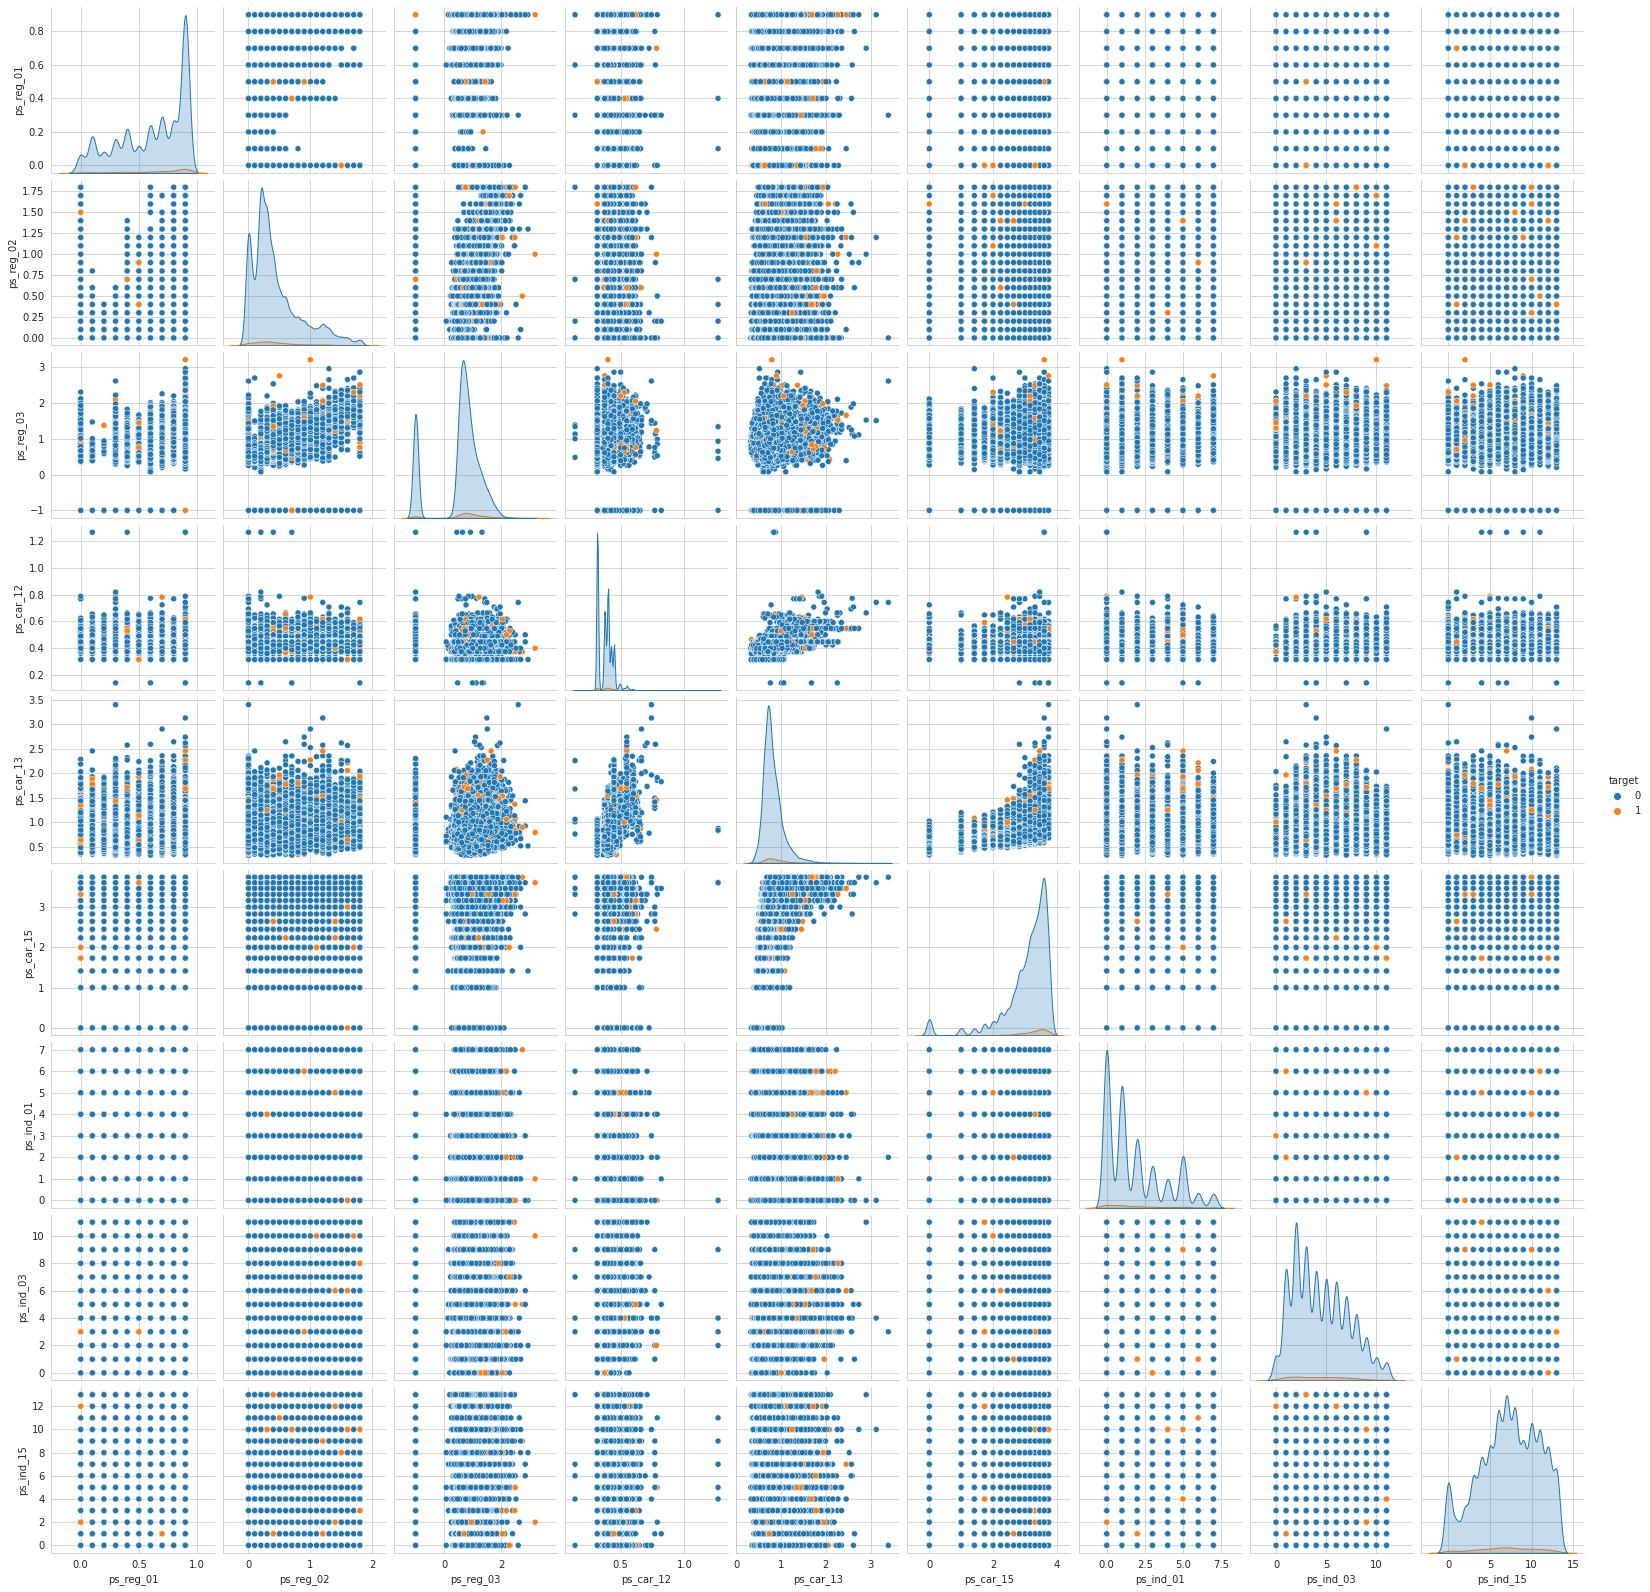

In [ ]:
corelated_features=['ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_15','ps_ind_01','ps_ind_03','ps_ind_15','target']
plt.figure()
sns.pairplot(train_data[corelated_features].sample(frac=0.08),hue='target')
plt.show()

**4.7.1 OBSERVATION: Pair plot of all the corelated features:**

**ps_ind_03**,  **ps_reg_01**,  **ps_car_12** may be key features as target value 1 can be easily identified by 8 % of total sample







## **5. Binary features:**

In [ ]:
binary_features=meta_data[(meta_data['type']=='Binary') ]['column_name']
binary_features=list(binary_features)
binary_features.remove('target')
print('total binary features are',len(binary_features))


total binary features are 17


## **5.1 Bar Plot of binary features (distribution against feature values 0 & 1)**

<Figure size 432x288 with 0 Axes>

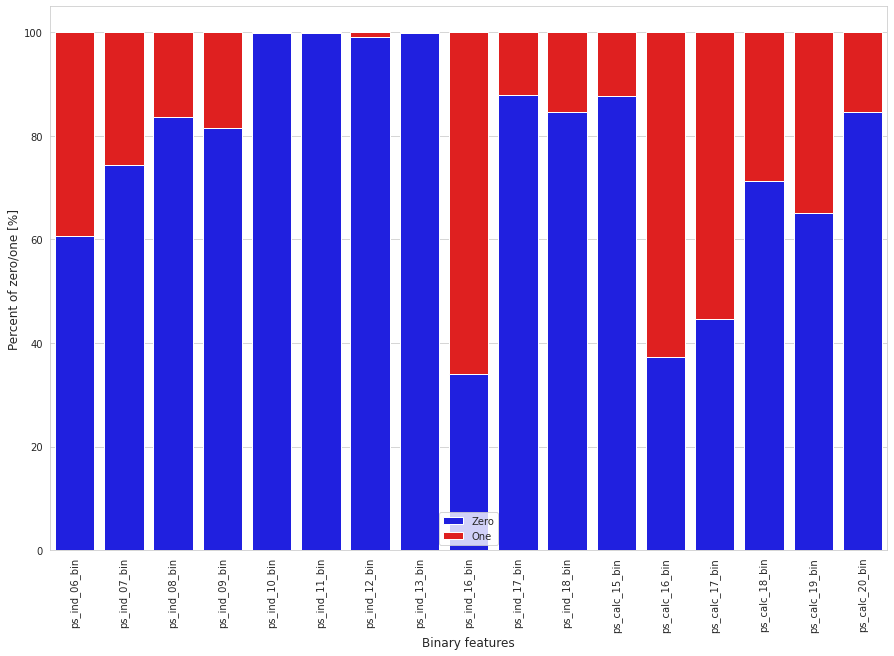

In [ ]:

t1_per=lambda x: (train_data[train_data[str(x)]==1][str(x)].count()*100/train_data.shape[0])
t0_per=lambda x: (train_data[train_data[str(x)]==0][str(x)].count()*100/train_data.shape[0])
one_list=[]
zero_list=[]
for feature in binary_features:
  one_list.append(t1_per(feature))
  zero_list.append(t0_per(feature))

plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
# Bar plot
p1 = sns.barplot(ax=ax, x=binary_features, y=zero_list, color="blue",label='Zero')
p2 = sns.barplot(ax=ax, x=binary_features, y=one_list, bottom= zero_list, color="red",label='One')
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.show()

**5.1.1 OBSERVATION: Bar plot Binary Features:**



*   **ps_ind_10_bin**,   **ps_ind_11_bin**,   **ps_ind_12_bin** and **ps_ind_13_bin** have very small number of values 1 (lesss than 0.5%) 
*   Number of value 1 is very large for **ps_ind_16_bin** and **ps_cals_16_bin** (more than 60%).






### **5.2 Density Distribution plots (Binary features)**

<Figure size 432x288 with 0 Axes>

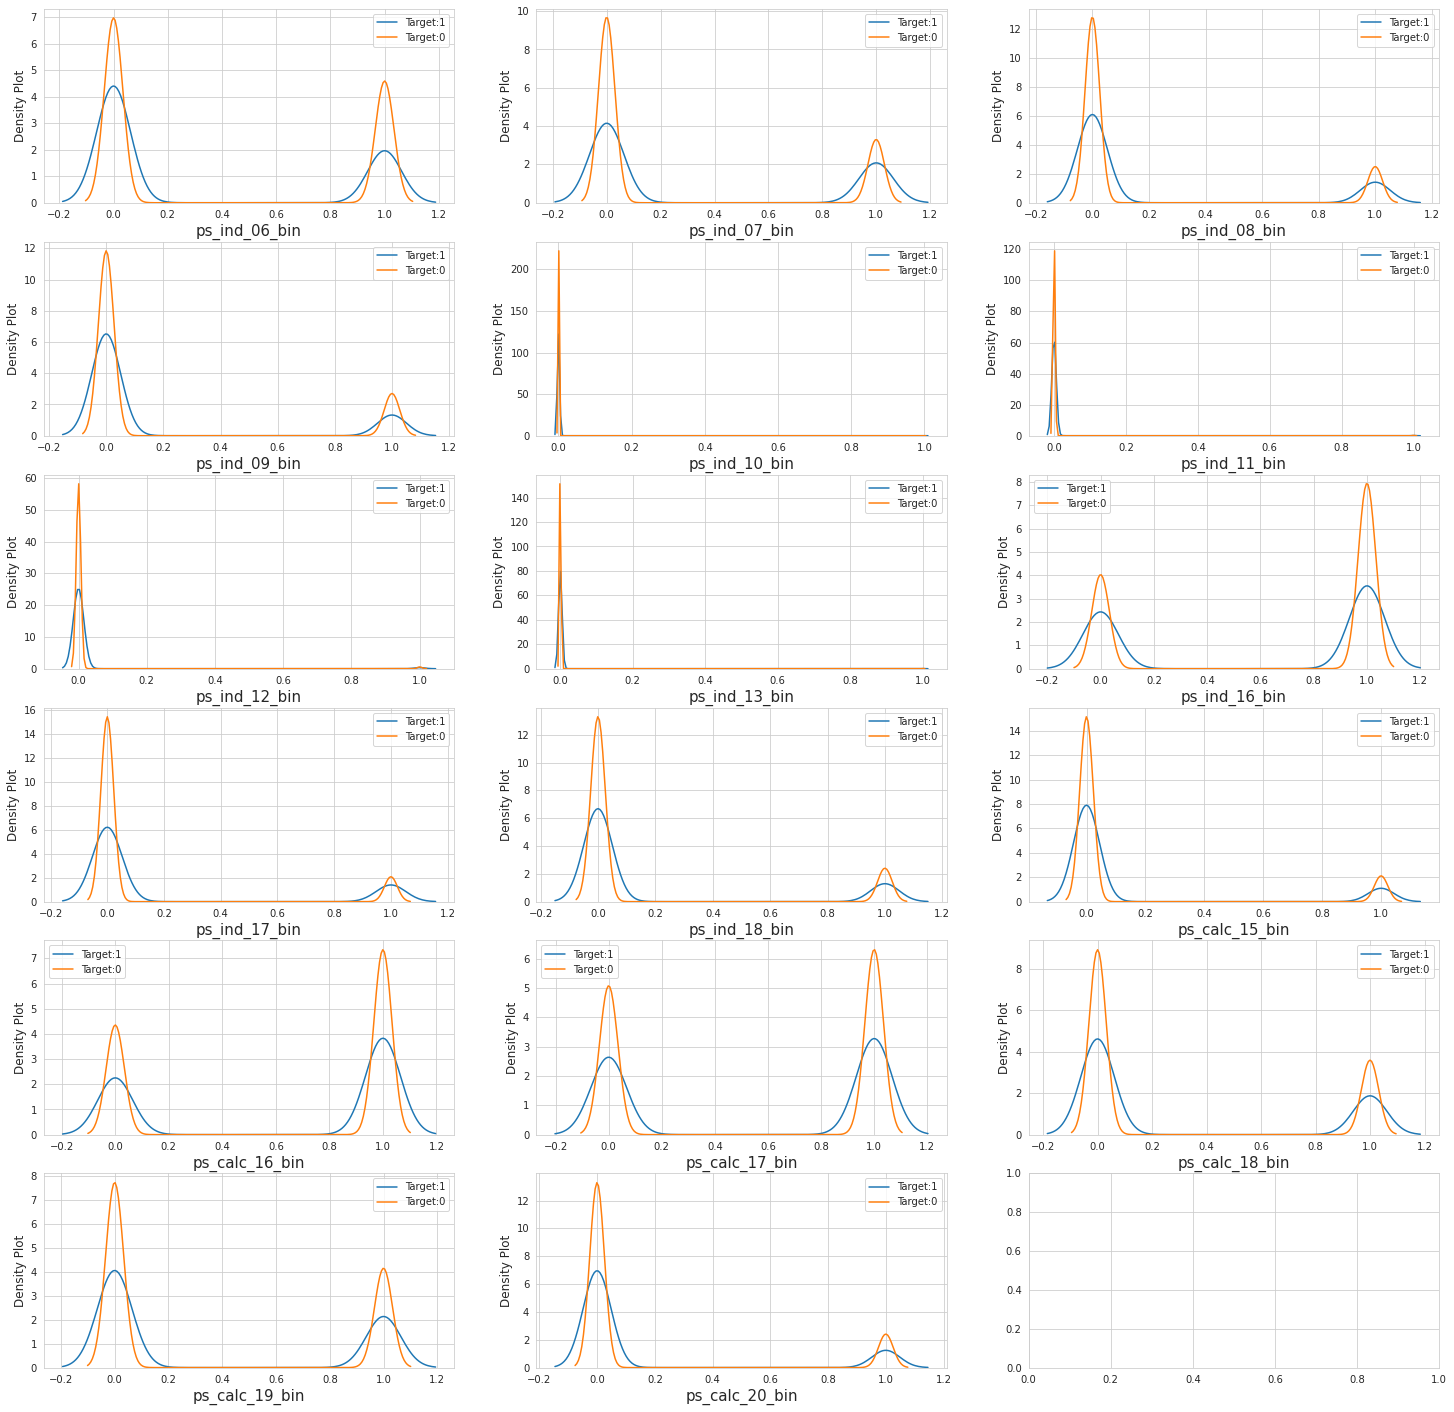

In [ ]:
t1=train_data.loc[train_data['target']==1]
t0=train_data.loc[train_data['target']!=1]
i=0
plt.figure()
sns.set_style('whitegrid')
fig, ax = plt.subplots(6,3,figsize=(25,25))

for feature in binary_features:
  i+=1
  plt.subplot(6,3,i)
  sns.kdeplot(t1[feature],label='Target:1')
  sns.kdeplot(t0[feature],label='Target:0')
  plt.ylabel('Density Plot',fontsize=12)
  plt.xlabel(str(feature),fontsize=15)
  locs, labels = plt.xticks()
  plt.legend()

plt.show()

**5.2.1 OBSERVATION: Density plot Binary Features:**



*   **ps_ind_10_bin**,   **ps_ind_13_bin**,   **ps_ind_12_bin**  having high data imbalance with respect to target value 0 & 1.

## **6. Categorical features:**

In [ ]:
categorical_features=meta_data[(meta_data['type']=='Categorical') ]['column_name']
categorical_features=list(categorical_features)
categorical_features.remove('id')
print('total categorical features are',len(categorical_features))



total categorical features are 14


## **6.1 Bar Plot of categorical features (distribution against feature values)**

<Figure size 432x288 with 0 Axes>

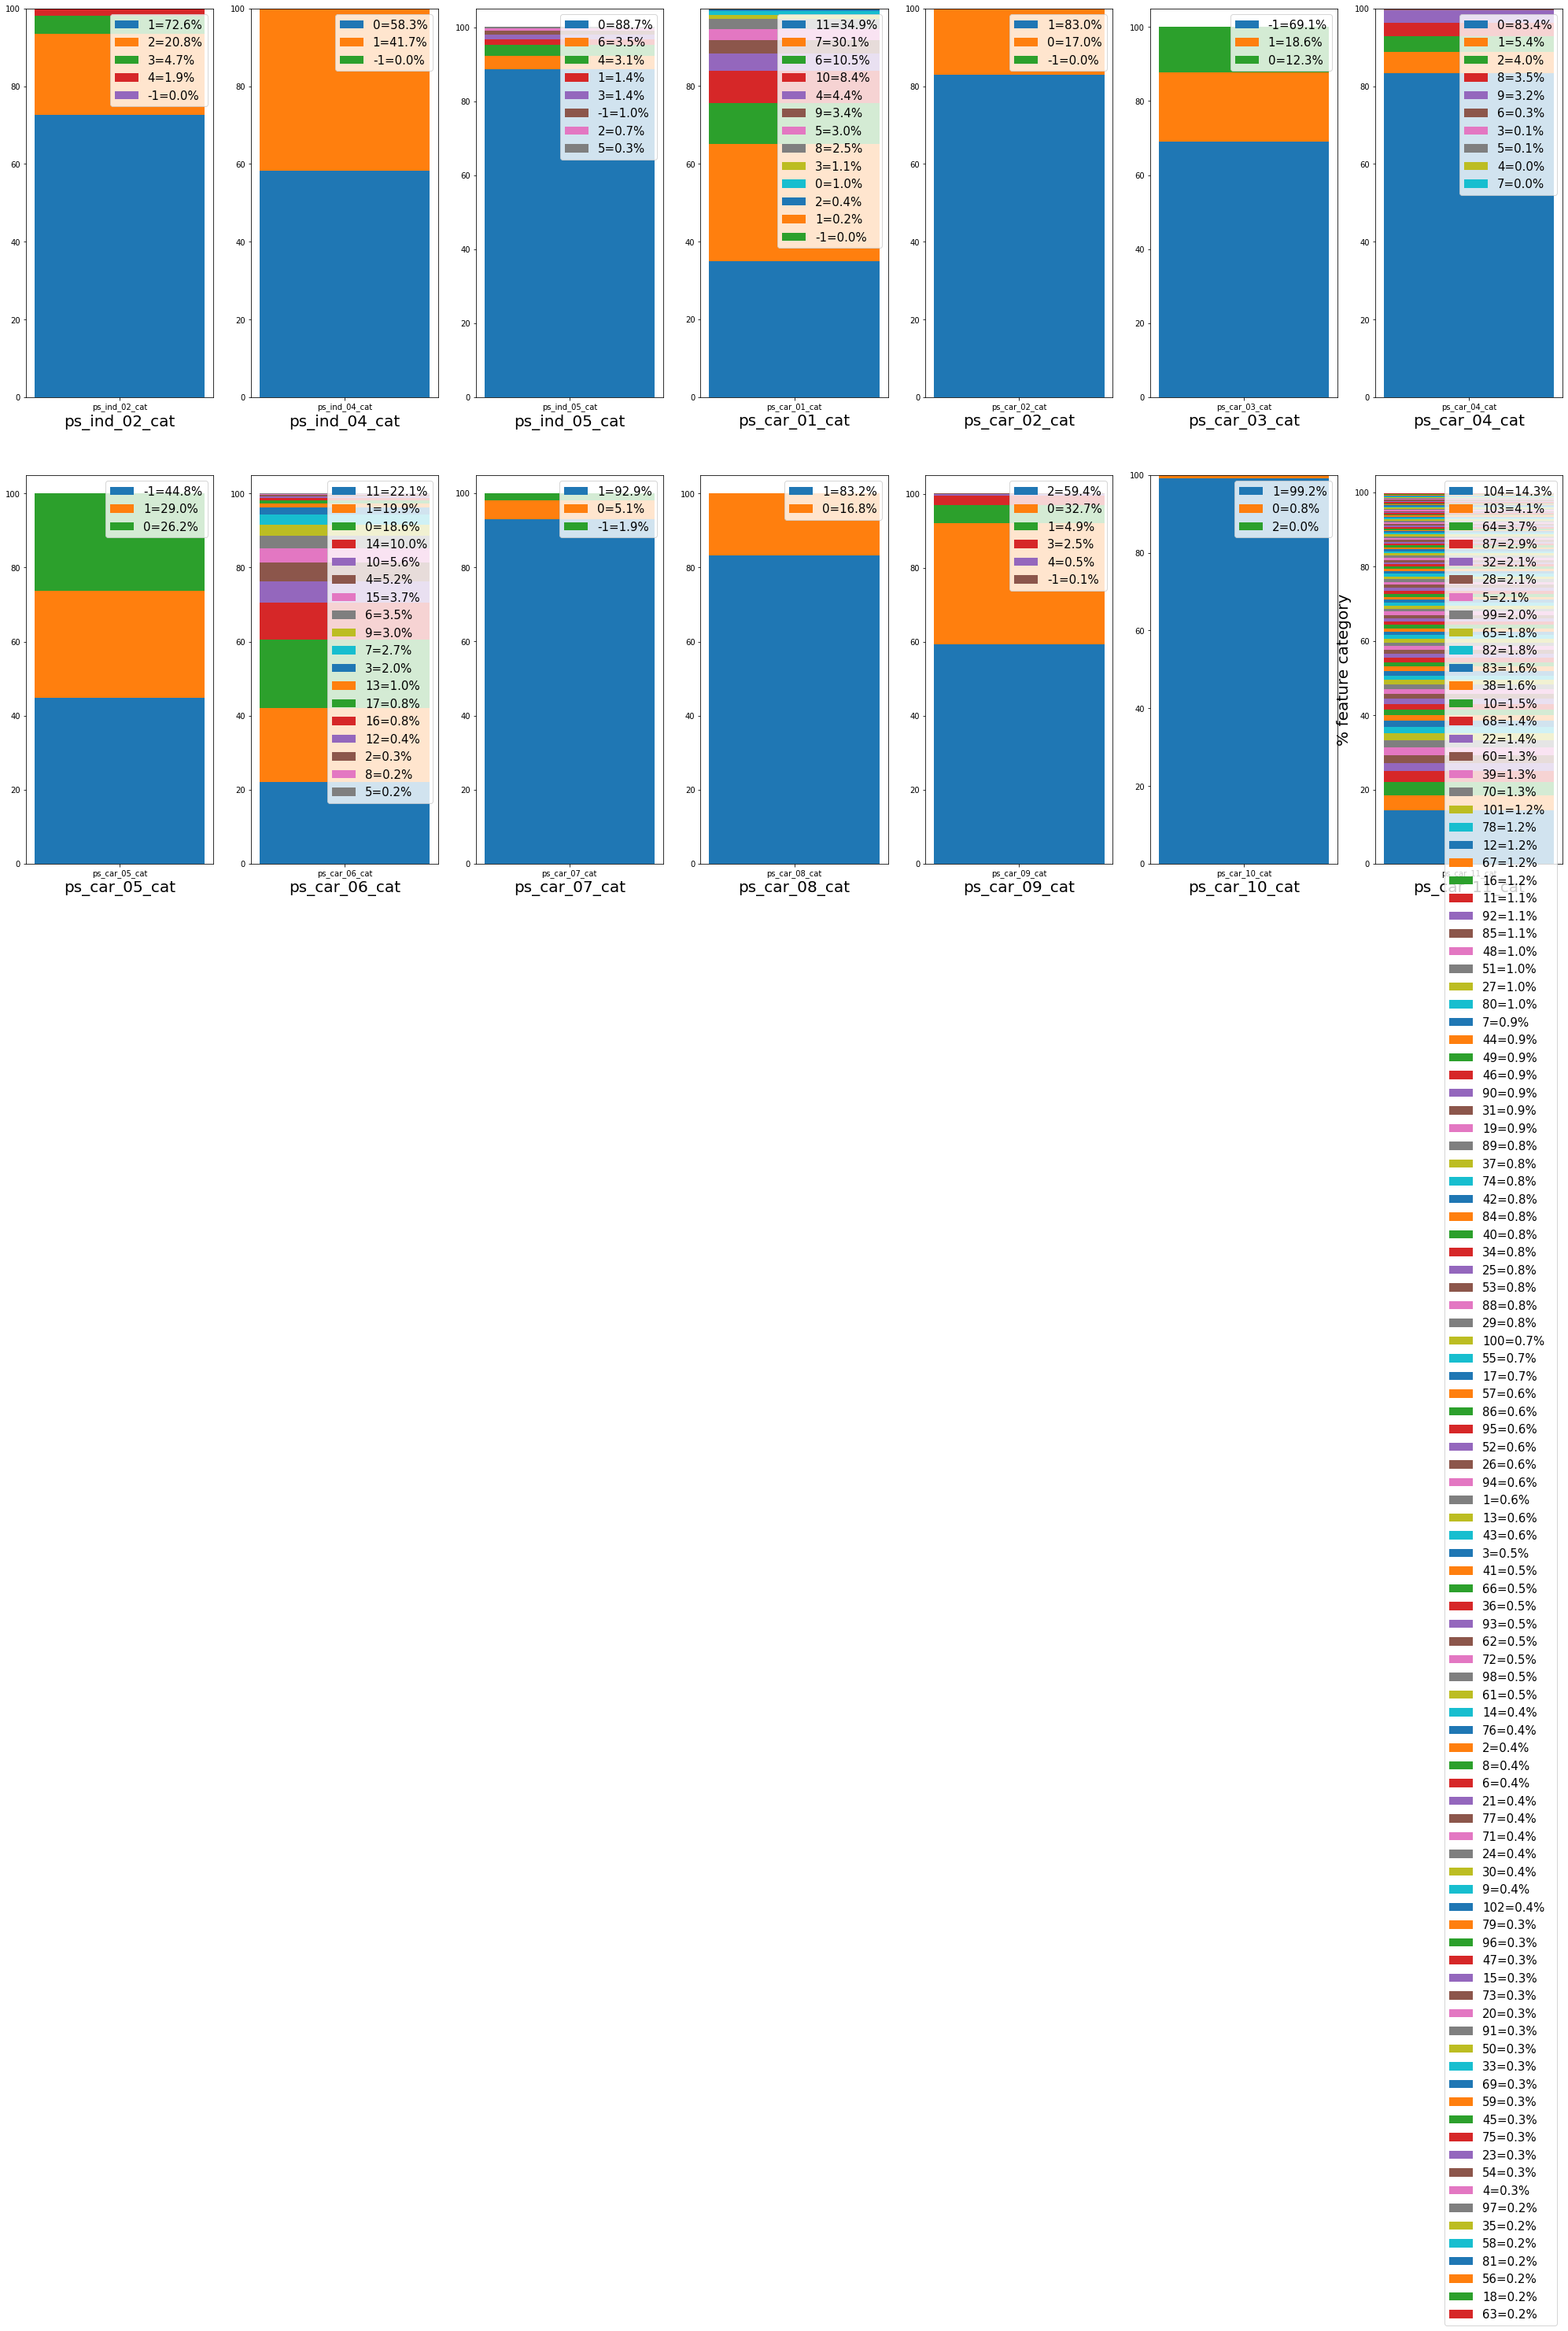

In [ ]:

plt.figure()
k=0
fig, ax = plt.subplots(2,7,figsize=(35,20))

for feature in categorical_features:
  val_list=list(pd.DataFrame(train_data[feature]).value_counts())
  ind_list=list(pd.DataFrame(train_data[feature]).value_counts().index)
  cat_list=[round(i*100/sum(val_list),1) for i in val_list]
  s=0
  k+=1
  plt.subplot(2,7,k)
  for i in range(len(cat_list)):
    if i==0:
      plt.bar(feature,cat_list[i],label=('{}={}%'.format(str(ind_list[i][0]),str(cat_list[i]))))
      s=cat_list[i]
    else:
      plt.bar(feature,cat_list[i],bottom=s,label=('{}={}%'.format(str(ind_list[i][0]),str(cat_list[i]))))
      s+=cat_list[i]
      plt.legend()
      plt.legend(loc=1, prop={'size': 15})
     
      plt.xlabel(feature,size=20)

plt.ylabel('% feature category',size=20)  
plt.show()


**6.1.1 OBSERVATION: Bar plot Categorical Features:**


*  **ps_car_03_cat** , **ps_car_05_cat** have more values as **-1** which represents as missing values




### **6.2 Density Distribution plots (Categorical features)**

<Figure size 432x288 with 0 Axes>

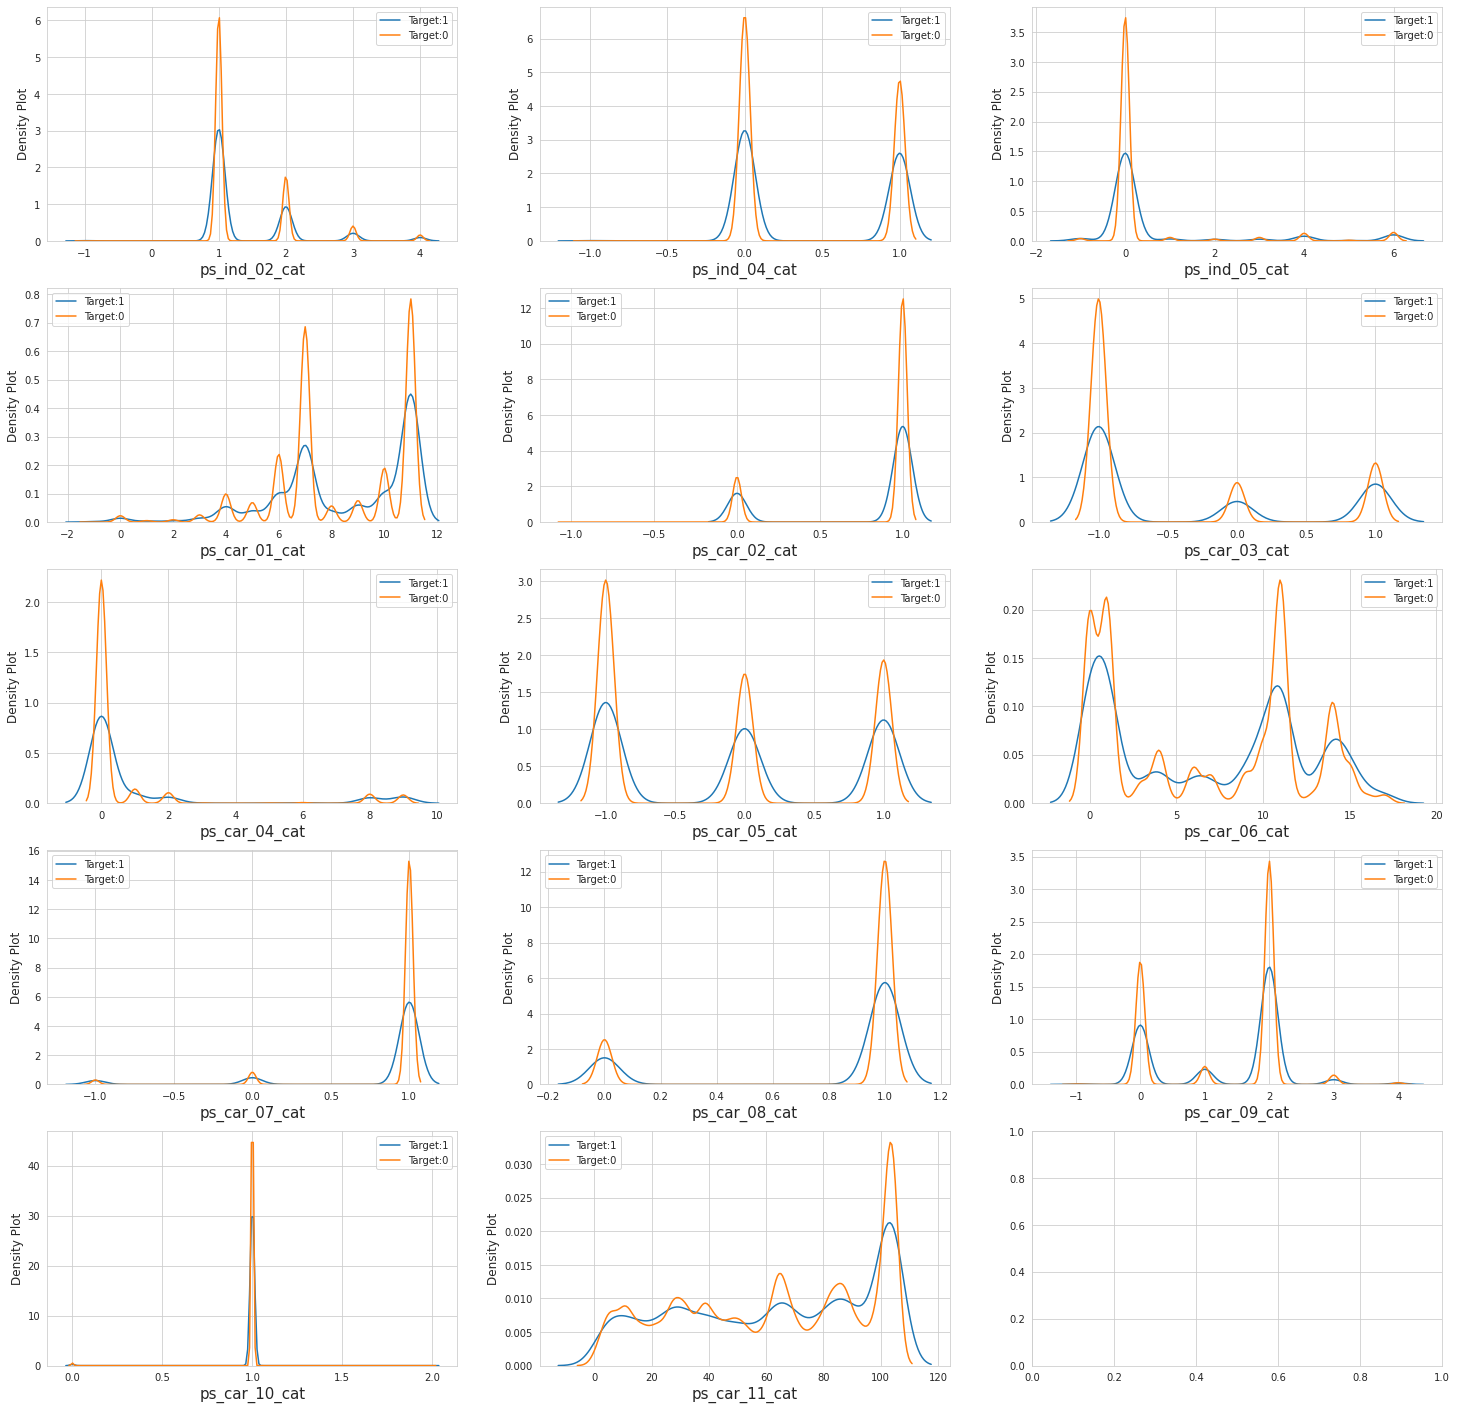

In [ ]:
t1=train_data.loc[train_data['target']==1]
t0=train_data.loc[train_data['target']!=1]
i=0
plt.figure()
sns.set_style('whitegrid')
fig, ax = plt.subplots(5,3,figsize=(25,25))

for feature in categorical_features:
  i+=1
  plt.subplot(5,3,i)
  sns.kdeplot(t1[feature],label='Target:1')
  sns.kdeplot(t0[feature],label='Target:0')
  plt.ylabel('Density Plot',fontsize=12)
  plt.xlabel(str(feature),fontsize=15)
  locs, labels = plt.xticks()
  plt.legend()

plt.show()

**6.2.1 OBSERVATION: Density plot Binary Features:**


*   Most of plots showing target **value 0 has more counts** than target value 1.
*   **ps_car_07_cat **, **pas_car_10_cat** seems to be more imbalance than other features



## **6. Data check between train and test data:**

### **6.1 Data balance check between train and test data(continous float valued features)**

<Figure size 432x288 with 0 Axes>

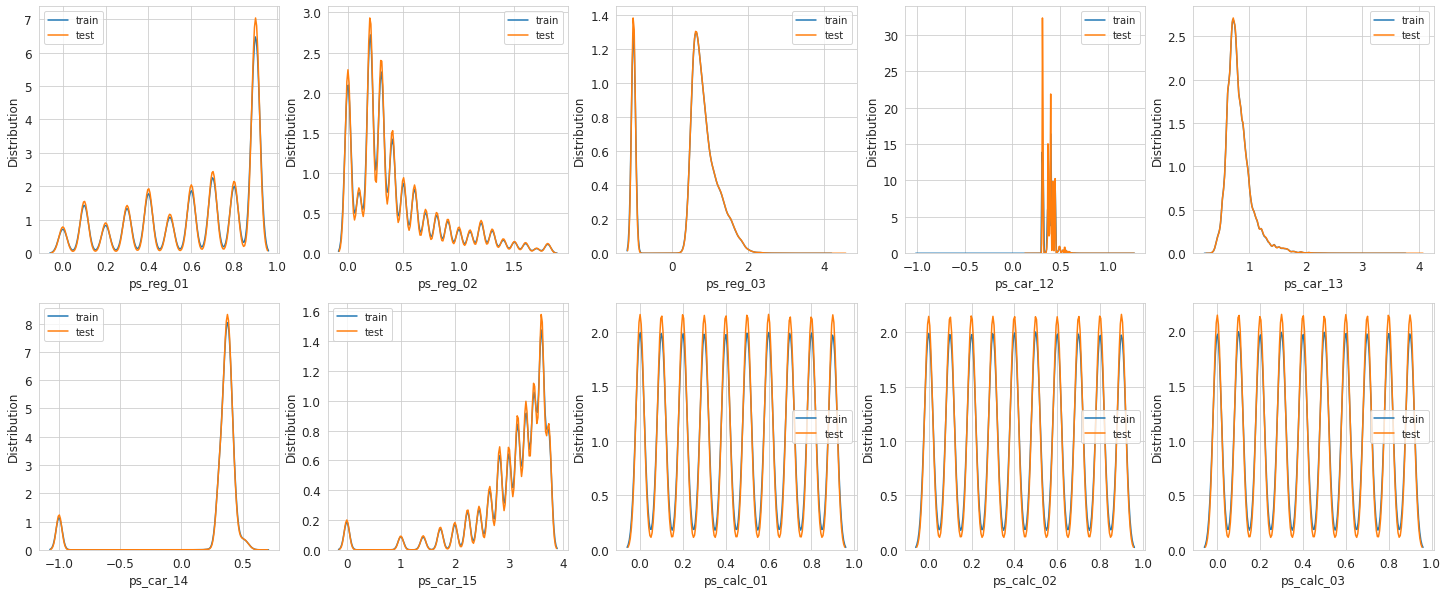

In [ ]:
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(2,5,figsize=(25,10))
i = 0
for feature in float_features:
    i+=1
    plt.subplot(2,5,i)
    sns.kdeplot(train_data[feature],label="train")
    sns.kdeplot(test_data[feature],label="test")
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### **6.2 Data balance check between train and test data(continous integer valued features)**

<Figure size 432x288 with 0 Axes>

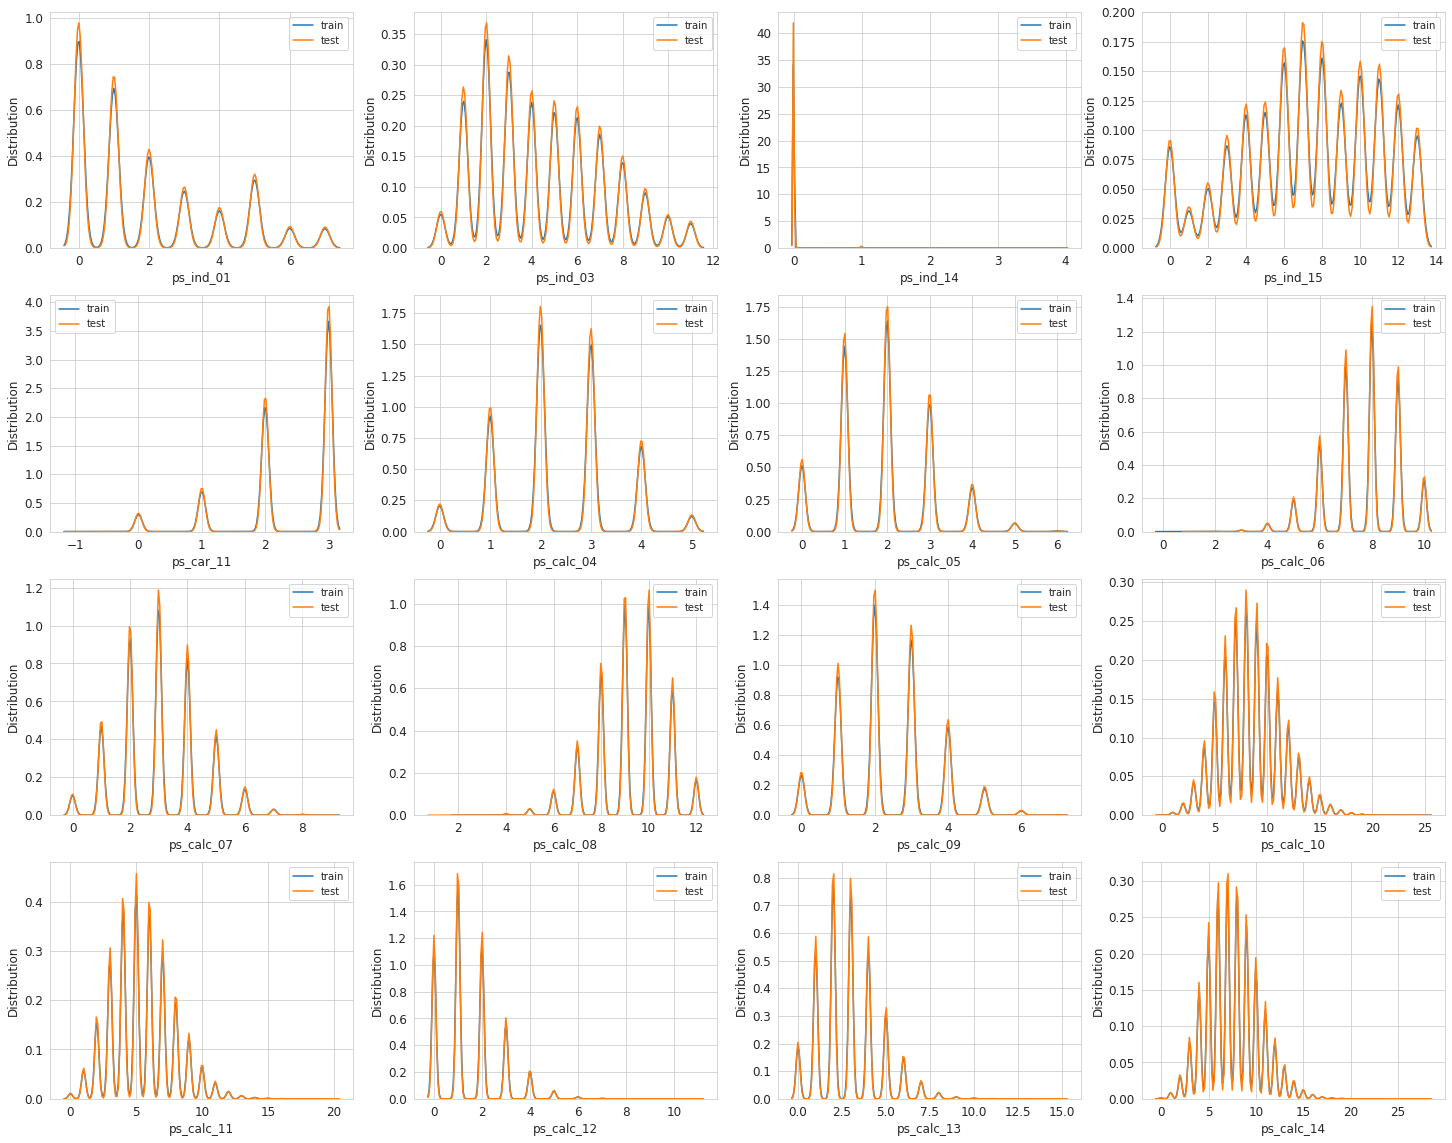

In [ ]:
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(4,4,figsize=(25,20))
i = 0
for feature in integer_features:
    i+=1
    plt.subplot(4,4,i)
    sns.kdeplot(train_data[feature],label="train")
    sns.kdeplot(test_data[feature],label="test")
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.legend()
    
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### **6.3 Data balance check between train and test data(binary valued features)**

<Figure size 432x288 with 0 Axes>

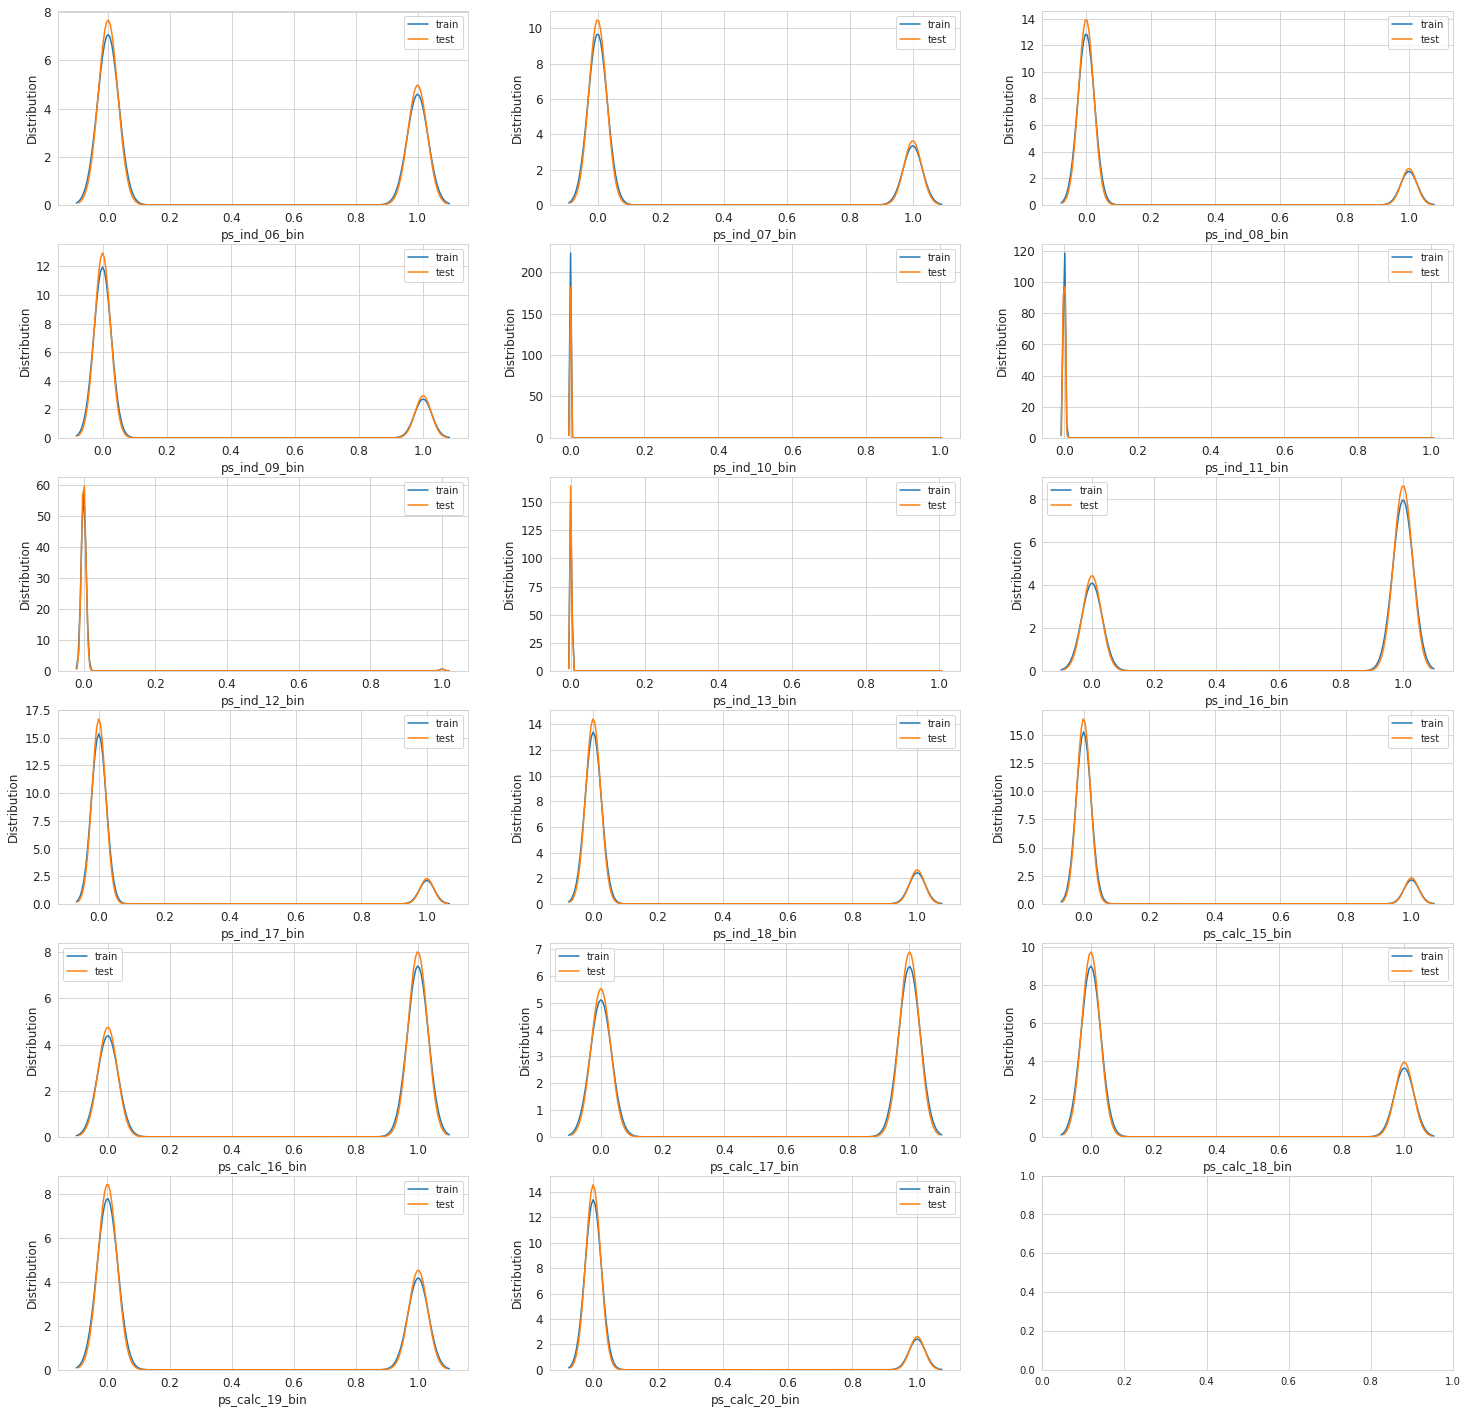

In [ ]:
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(6,3,figsize=(25,25))
i = 0
for feature in binary_features:
    i+=1
    plt.subplot(6,3,i)
    sns.kdeplot(train_data[feature],label="train")
    sns.kdeplot(test_data[feature],label="test")
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.legend()
    
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### **6.4 Data balance check between train and test data(categorical valued features)**

<Figure size 432x288 with 0 Axes>

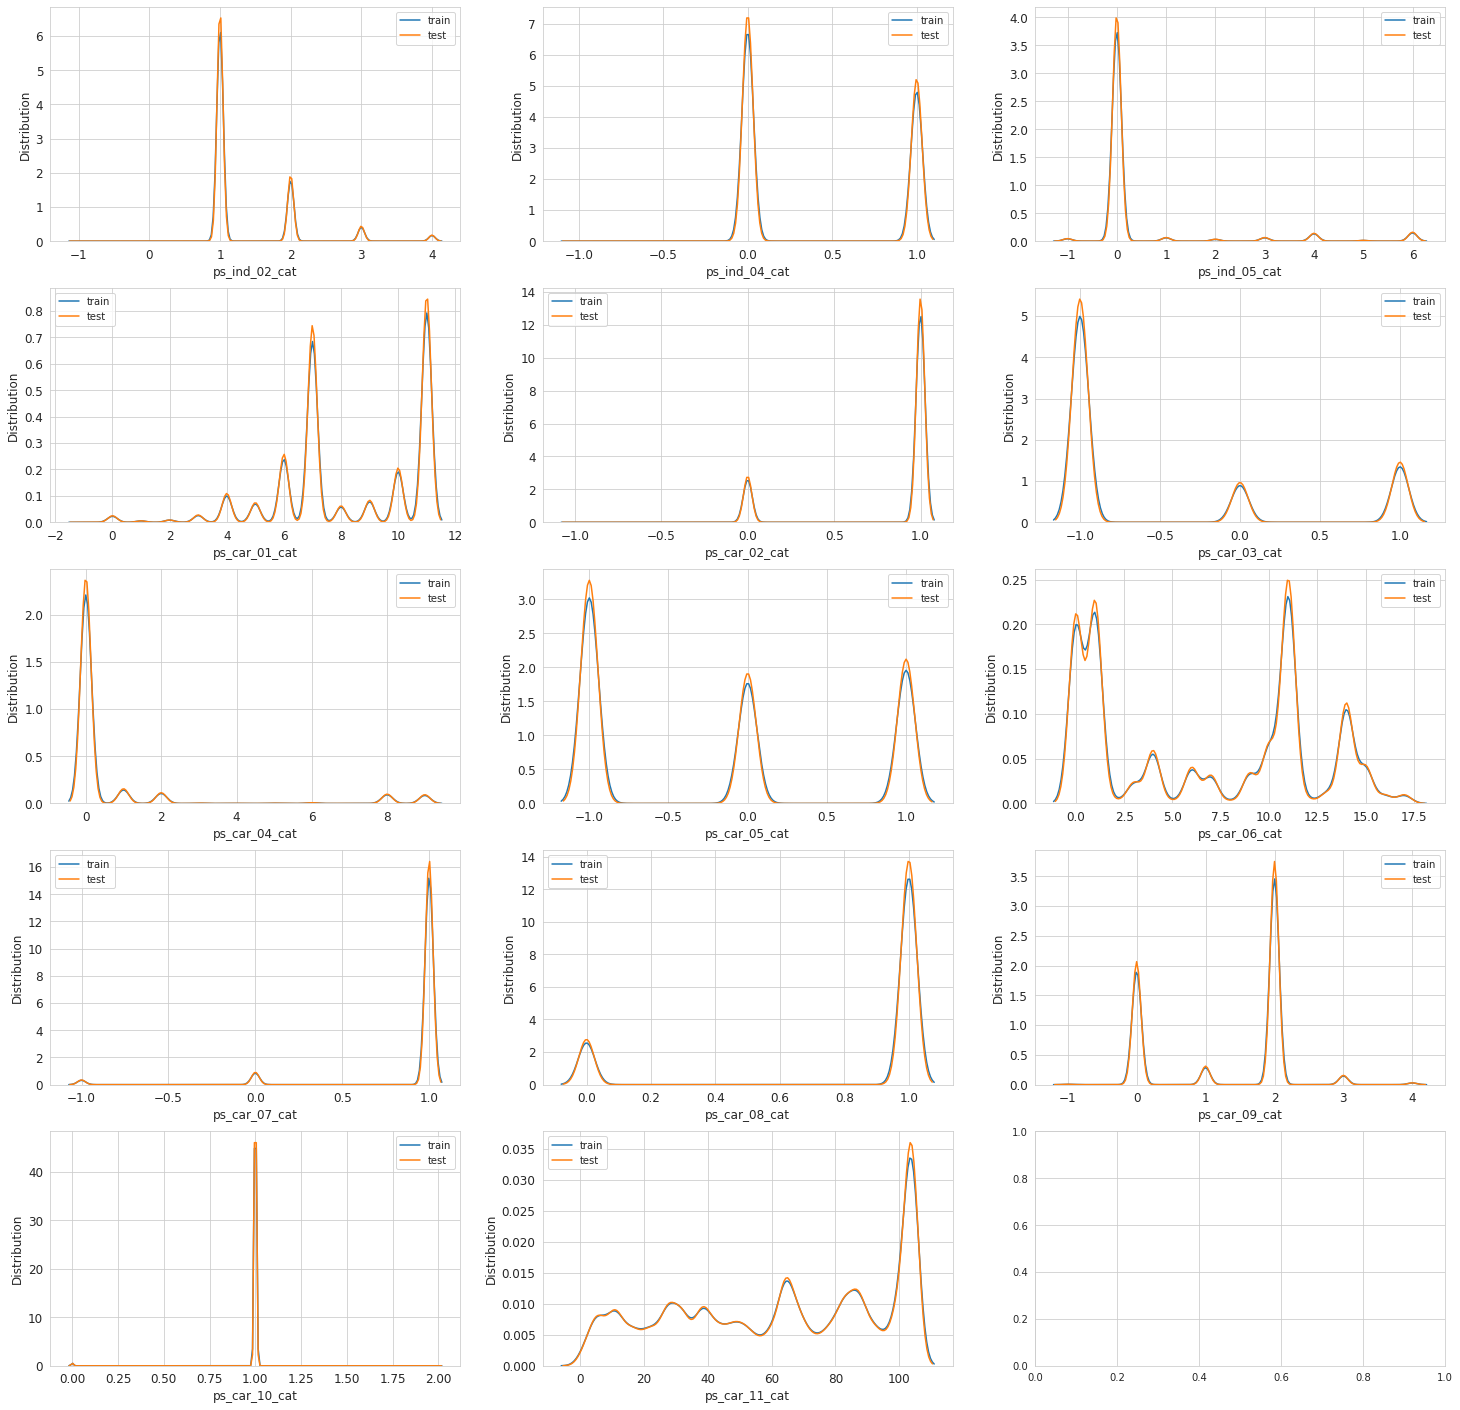

In [ ]:
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(5,3,figsize=(25,25))
i = 0
for feature in categorical_features:
    i+=1
    plt.subplot(5,3,i)
    sns.kdeplot(train_data[feature],label="train")
    sns.kdeplot(test_data[feature],label="test")
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.legend()
    
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**6: OBSERVATION: All Train Test Features Data Check:**








*   All features have **same data distribution in train and test data set** as per above plots.




## **7.Missing Value Check:**

In [ ]:
features_with_missing_values = []

for feature in train_data.columns:
    missings = train_data[train_data[feature] == -1][feature].count()
    if missings > 0:
        features_with_missing_values.append(feature)
        missings_perc = round((missings*100)/train_data.shape[0],2)
        
        print('Variable {} has {} records {}% with missing values'.format(feature, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(features_with_missing_values)))

Variable ps_ind_02_cat has 216 records 0.04% with missing values
Variable ps_ind_04_cat has 83 records 0.01% with missing values
Variable ps_ind_05_cat has 5809 records 0.98% with missing values
Variable ps_reg_03 has 107772 records 18.11% with missing values
Variable ps_car_01_cat has 107 records 0.02% with missing values
Variable ps_car_02_cat has 5 records 0.0% with missing values
Variable ps_car_03_cat has 411231 records 69.09% with missing values
Variable ps_car_05_cat has 266551 records 44.78% with missing values
Variable ps_car_07_cat has 11489 records 1.93% with missing values
Variable ps_car_09_cat has 569 records 0.1% with missing values
Variable ps_car_11 has 5 records 0.0% with missing values
Variable ps_car_12 has 1 records 0.0% with missing values
Variable ps_car_14 has 42620 records 7.16% with missing values
In total, there are 13 variables with missing values


## **8.T-SNE Visualization on Train data :**

t-SNE done! Time elapsed: 80.64330911636353 seconds
t-SNE done! Time elapsed: 74.65680480003357 seconds
t-SNE done! Time elapsed: 83.55474615097046 seconds
t-SNE done! Time elapsed: 90.35984301567078 seconds
t-SNE done! Time elapsed: 99.52321362495422 seconds


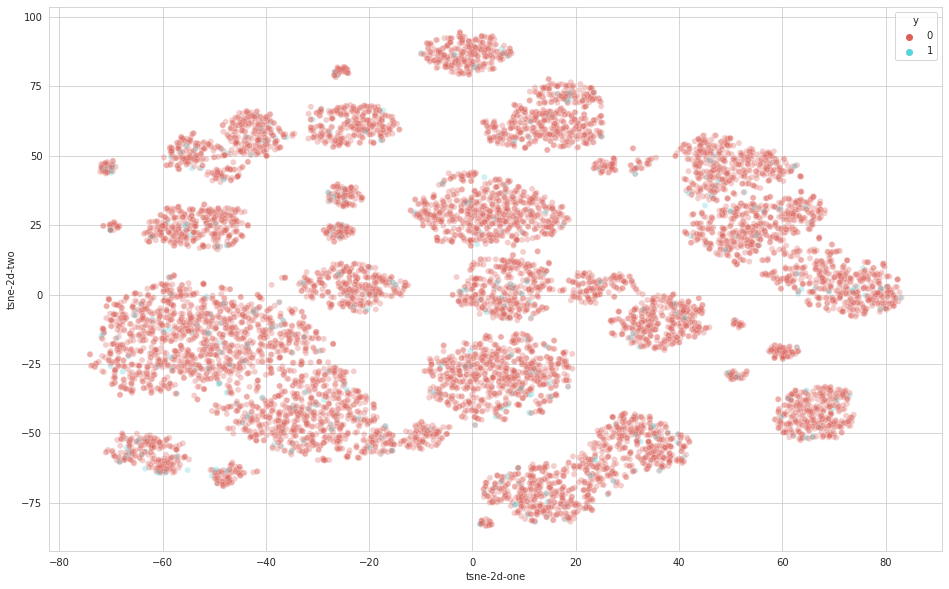

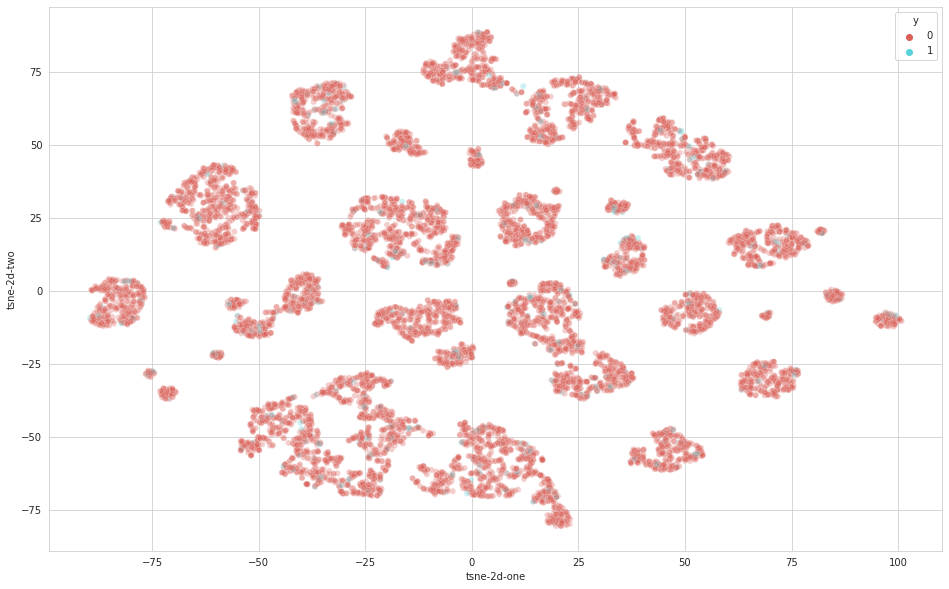

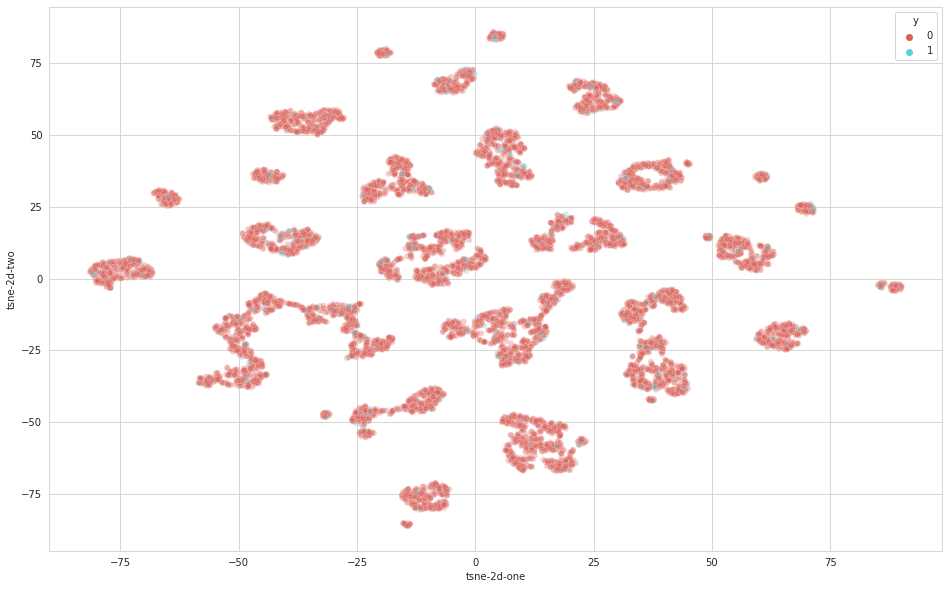

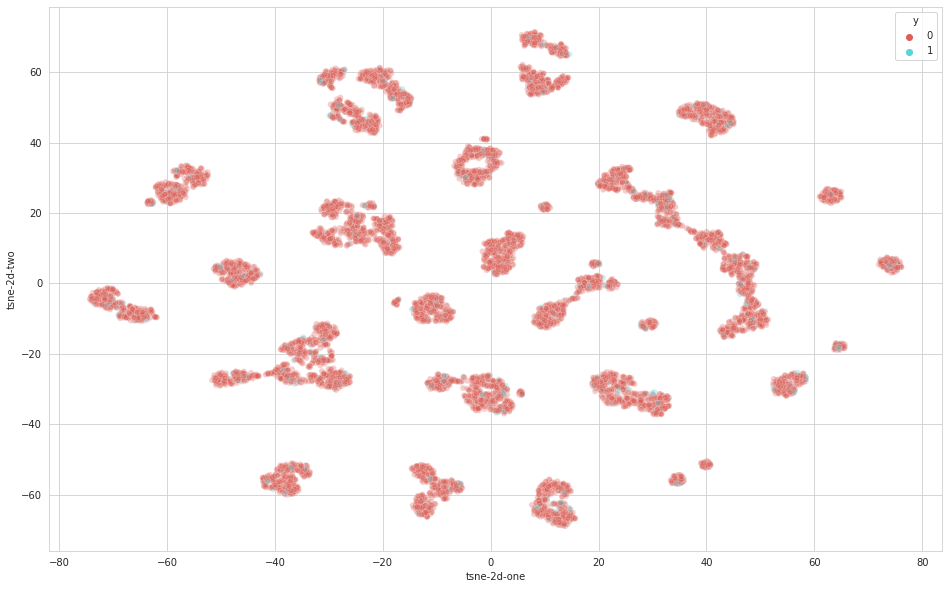

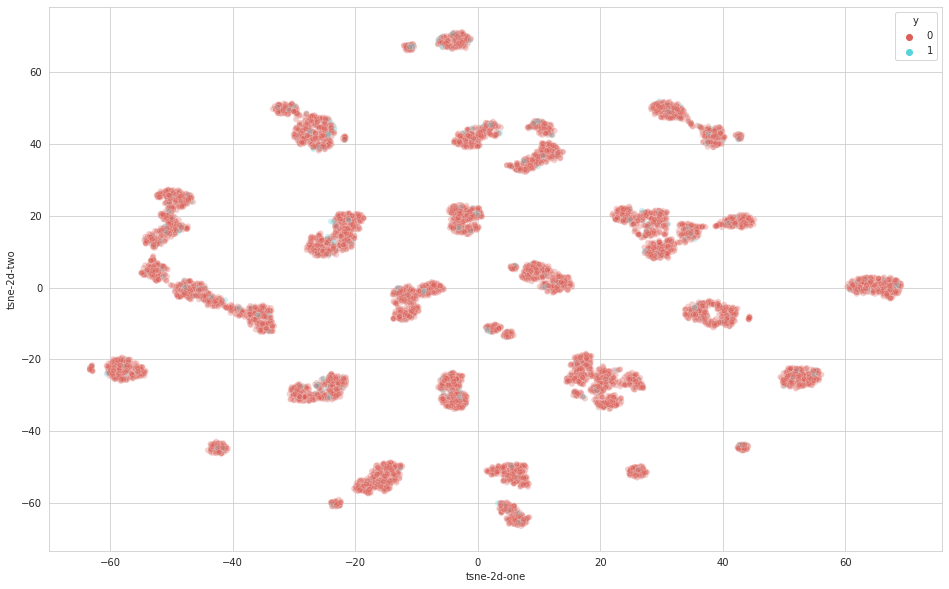

In [ ]:
final_data_set_features=cont + binary_features + categorical_features
final_data_set=train_data[final_data_set_features]
final_data_set['y']=train_data['target']
perp_list=[20,40,60,80,100]
N = 10000
rndperm = np.random.permutation(final_data_set.shape[0])
df_subset = final_data_set.loc[rndperm[:N],:].copy()
for i in perp_list:
  time_start = time.time()
  result = TSNE(n_components=2,perplexity=i,n_jobs=-1).fit_transform(df_subset )
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
  df_subset['tsne-2d-one'] = result[:,0]
  df_subset['tsne-2d-two'] = result[:,1]
  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
                )


**8.1: OBSERVATION: T-SNE plots:**


1.   **For Perplexity 20 :** The points in 2-d are distinguishable but output variable is not separable as both target values are present across diffrent clusters
2.  For other Perplexities its hard to distinguish and conclude anything.



## **9.Dimensionality reduction and visualisation using PCA:**

PCA done! Time elapsed: 0.07683300971984863 seconds


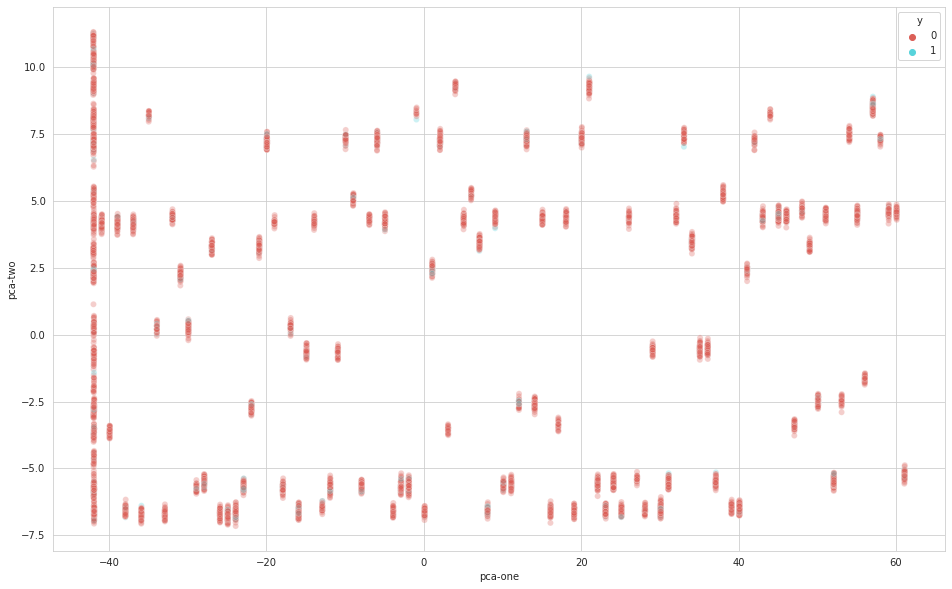

In [ ]:
# reference : towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
final_data_set_features=cont + binary_features + categorical_features
final_data_set=train_data[final_data_set_features]
final_data_set['y']=train_data['target']
N = 10000
rndperm = np.random.permutation(final_data_set.shape[0])
df_subset = final_data_set.loc[rndperm[:N],:].copy()
time_start = time.time()
pca= PCA(n_components=2)
pca_result = pca.fit_transform(df_subset)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
                )


**9.1: OBSERVATION: PCA plots:**

*   After performing PCA to two dimensional data for 10k sample points, the out put values seems to be present across all custers hence not conclusive on indetification on individual target value


